In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display

In [3]:
# Define colors
GRAY = ['#231F20', '#393536', '#4f4c4d', '#656263', '#7b7979', '#918f90', '#a7a5a6', '#bdbcbc', '#d3d2d2', '#e9e9e9']
BLUE = ['#174b7e','#2e5d8b', '#456f98', '#5d81a5', '#7493b2', '#8ba5bf', '#a2b7cb', '#b9c9d8', '#d1dbe5', '#e8edf2']
RED = ['#C3514E', '#E6BAB7']
GREEN = ['#0C8040', '#9ABB59']
ORANGE = ['#F79747']

# Configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'

In [4]:
# Read in dataset
data = pd.read_excel('../datasets/sonderauswertung-nahrungsmittel.xlsx', sheet_name='Index_10-Steller', skiprows=5)
data = data.drop(data.index[168:])
data = data.drop(data.columns[1], axis=1)
data

,Unnamed: 0,Unnamed: 2,Januar,Februar,März,April,Mai,Juni,Juli,August,...,Mai.2,Juni.2,Juli.2,August.2,September.2,Oktober.2,November.2,Dezember.2,Januar.3,Februar.3
0,CC13-0111101100,Reis,99.6,99.1,100.3,100.5,102.5,101.7,99.5,99.5,...,113.9,115.1,115.8,121.9,122.8,125.7,126.7,127.0,127.6,127.6
1,CC13-0111109100,Reiszubereitung,100.0,101.3,101.1,101.6,101.6,100.1,98.0,98.7,...,110.1,111.5,114.8,119.3,122.3,122.5,125.1,128.9,129.1,134.4
2,CC13-0111201100,Weizenmehl,100.9,100.8,100.0,102.1,102.6,101.9,98.8,98.9,...,140.9,150.4,140.6,140.8,140.3,137.8,163.7,166.7,169.4,171.8
3,CC13-0111203100,"Grieß, Roggenmehl oder Ähnliches",101.3,101.6,101.6,101.7,101.4,101.5,98.9,98.5,...,131.8,133.1,134.9,135.4,134.7,135.5,137.8,139.7,143.4,147.8
4,CC13-0111311100,Weißbrot,101.0,100.8,100.7,100.7,101.0,100.8,98.7,99.1,...,113.8,115.3,117.1,117.0,119.0,121.1,122.3,123.1,128.1,129.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,CC13-0122230100,Energy-Drinks,101.7,101.6,102.6,101.7,101.6,101.7,97.8,99.0,...,103.3,103.9,103.8,105.0,104.4,104.7,105.3,103.3,104.8,104.3
164,CC13-0122311100,Apfelsaft oder ähnlicher Fruchtsaft,99.0,100.1,99.7,100.4,101.9,102.1,99.6,99.3,...,105.4,106.0,106.8,106.4,108.6,106.8,109.6,110.1,114.4,118.7
165,CC13-0122312200,Orangensaft oder ähnlicher Fruchtsaft,103.3,101.1,101.0,102.5,102.6,102.1,97.7,97.8,...,102.1,103.9,104.4,104.3,105.8,107.6,114.5,115.9,117.4,121.3
166,CC13-0122315100,Multivitaminsaft,100.9,100.3,99.7,100.2,102.1,101.7,99.4,99.6,...,102.7,103.1,104.0,103.3,105.8,107.1,109.5,109.1,109.5,113.0


In [5]:
# Sort dataset by difference of first and last measure
data = data.assign(diff=data['Februar.3'] - data['Januar'])
data = data.sort_values(by='diff', ascending=True)

categories = data.iloc[:, 1]
diff = data['diff']
inflation_price_index = data.iloc[:,2:-1]

display(categories)
display(diff)
display(inflation_price_index)

84                                    Birnen
163                            Energy-Drinks
87                               Weintrauben
56               Tiefgefrorene Meeresfrüchte
156            Schwarzer Tee oder grüner Tee
                       ...                  
2                                 Weizenmehl
121                                   Zucker
69                                     Quark
101                                   Gurken
79     Sonnenblumenöl, Rapsöl oder Ähnliches
Name: Unnamed: 2, Length: 168, dtype: object

84       1.2
163      2.6
87       4.3
56       5.0
156      5.2
       ...  
2       70.9
121     79.5
69      86.8
101     98.6
79     110.5
Name: diff, Length: 168, dtype: float64

,Januar,Februar,März,April,Mai,Juni,Juli,August,September,Oktober,...,Mai.2,Juni.2,Juli.2,August.2,September.2,Oktober.2,November.2,Dezember.2,Januar.3,Februar.3
84,98.2,99.7,101.6,104.2,105.6,108.0,108.3,104.5,94.6,91.8,...,102.6,101.8,101.4,101.1,96.7,96.5,100.0,95.8,96.2,99.4
163,101.7,101.6,102.6,101.7,101.6,101.7,97.8,99.0,98.6,98.0,...,103.3,103.9,103.8,105.0,104.4,104.7,105.3,103.3,104.8,104.3
87,111.6,122.4,112.4,105.0,100.9,104.2,94.1,84.9,79.4,82.1,...,107.1,110.9,100.4,92.8,88.9,87.0,101.3,124.8,116.8,115.9
56,101.3,101.1,100.3,100.6,100.4,100.8,98.7,99.5,99.8,99.0,...,100.9,100.8,102.1,101.7,104.2,104.4,105.4,105.7,105.9,106.3
156,100.3,99.9,100.2,100.7,101.3,100.9,99.5,99.3,99.7,99.4,...,102.8,103.9,104.3,104.3,104.5,103.7,105.0,104.6,105.0,105.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,100.9,100.8,100.0,102.1,102.6,101.9,98.8,98.9,97.8,98.9,...,140.9,150.4,140.6,140.8,140.3,137.8,163.7,166.7,169.4,171.8
121,99.7,99.6,100.8,100.5,100.8,101.5,99.0,98.9,99.4,98.1,...,105.8,106.3,105.1,106.4,106.1,145.9,154.0,169.8,177.1,179.2
69,97.1,97.6,97.9,97.9,101.8,102.7,100.7,100.9,100.8,100.5,...,118.6,124.7,160.8,167.0,168.7,169.9,171.2,171.8,181.2,183.9
101,100.3,153.8,124.4,93.5,80.9,80.9,82.8,81.6,101.7,93.6,...,98.4,101.3,99.9,131.0,144.9,138.9,117.3,143.2,148.6,198.9


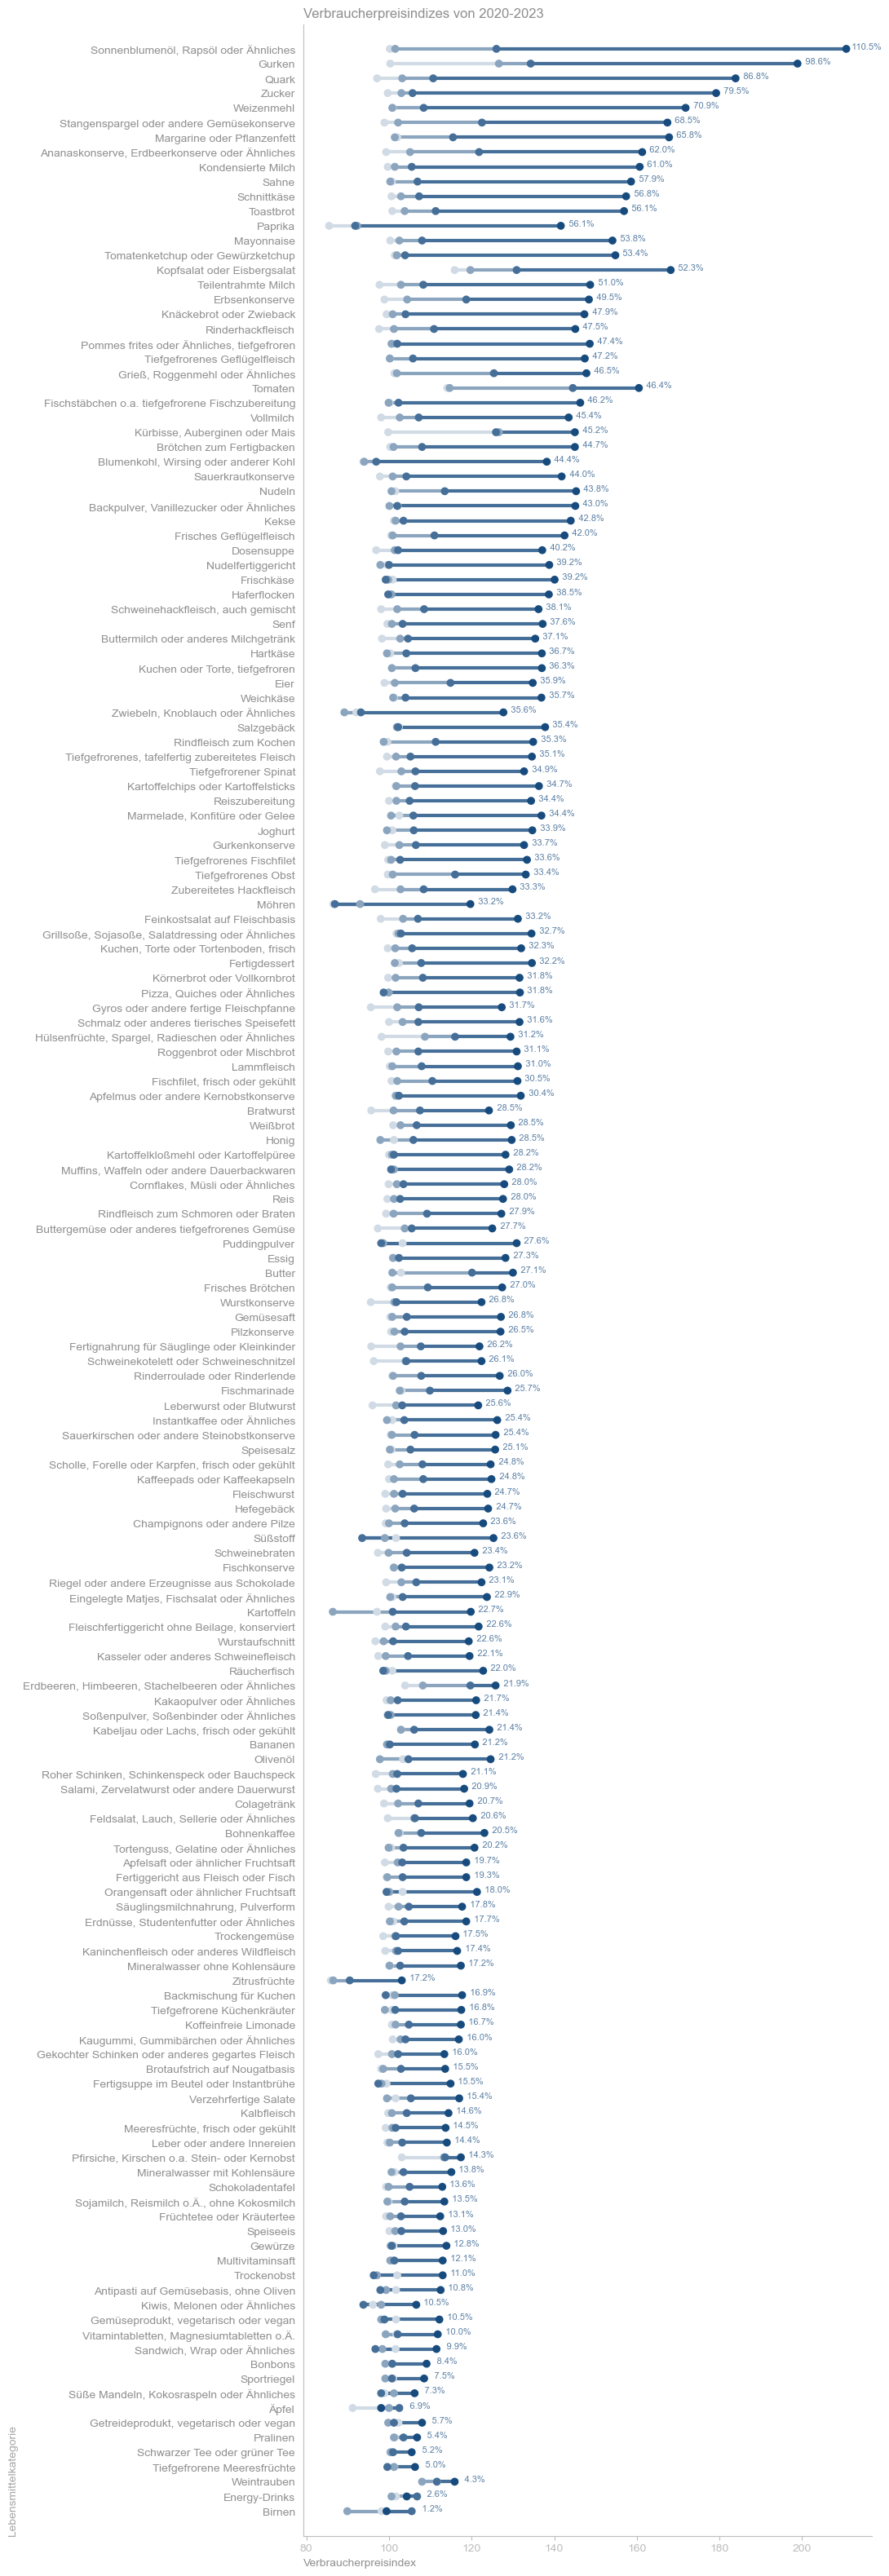

In [7]:
plt.figure(figsize=(9, 40))
plot = plt.subplot()
plot.margins(y=0.01)

for i in range(len(inflation_price_index)):
    category = [categories.iloc[i], categories.iloc[i], categories.iloc[i], categories.iloc[i]]
    prices_per_year = [inflation_price_index.iloc[i]['Januar'], inflation_price_index.iloc[i]['Januar.1'],inflation_price_index.iloc[i]['Januar.2'], inflation_price_index.iloc[i]['Februar.3']]
    plot.plot(prices_per_year[0:2], category[0:2], color=BLUE[8], linewidth=3, zorder=1)
    plot.plot(prices_per_year[1:3], category[1:3], color=BLUE[5], linewidth=3, zorder=2)
    plot.plot(prices_per_year[2:4], category[2:4], color=BLUE[2], linewidth=3, zorder=3)
    plot.annotate("{:7.1f}%".format(diff.iloc[i]), xy=(max(prices_per_year), category[0]), xycoords='data', size=8, color=BLUE[3])
    plot.scatter(prices_per_year, category, color=[BLUE[8], BLUE[5], BLUE[2], BLUE[0]], zorder=4)
    
plot.set_title("Verbraucherpreisindizes von 2020-2023", loc="left", color=GRAY[5])

plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.spines['bottom'].set_color(GRAY[7])
plot.spines['left'].set_color(GRAY[7])

plot.tick_params(axis='x', colors=GRAY[7], which='both')
plot.tick_params(axis='y', colors=GRAY[5], which='both', left=False)

plot.set_xlabel('Verbraucherpreisindex', loc='left', color=GRAY[5])
plot.set_ylabel('Lebensmittelkategorie', loc='bottom', color=GRAY[6])

plt.show()